In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# 17 network-level epicenters
df = pd.read_csv(r'/media/shuang/data/repository/result/age95.csv')
df

,n,epi,age
0,1,0.076618,12.4
1,1,-0.086926,14.1
2,1,0.086737,14.0
3,1,0.158344,11.7
4,1,0.118307,15.7
...,...,...,...
1610,17,-0.052172,15.0
1611,17,0.020158,17.0
1612,17,0.013375,17.0
1613,17,-0.069781,13.0


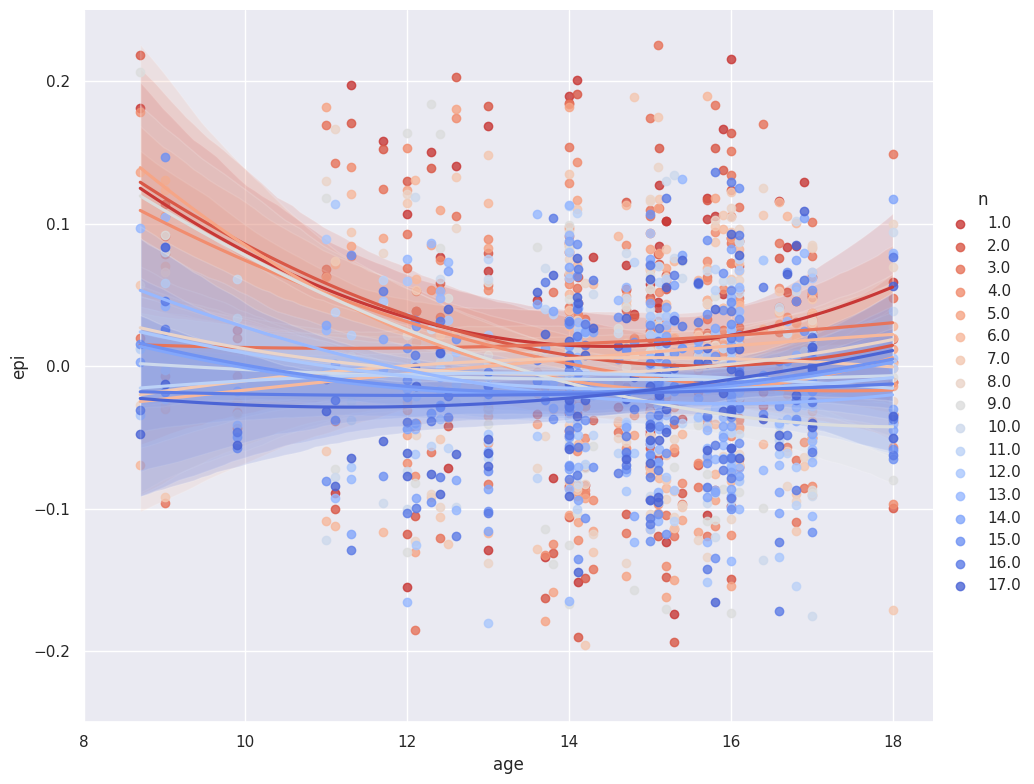

In [20]:
sns.set_theme(style="darkgrid")
ax=sns.lmplot(data=df,x="age",y="epi",hue="n",scatter=True,order=2,palette=sns.color_palette('coolwarm_r',17),aspect=1.2,height=8)
ax.set(xlim=(8,18.5),ylim=(-0.25,0.25))
plt.savefig("/media/shuang/data/repository/figures/agefcepi.svg", format="svg",dpi=1000)

In [13]:
# 3-stage epicenters
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Create the data
df = pd.read_csv(r'/media/shuang/data/repository/result/epi400.csv')
df

,epifc,episc,yeo7,yeo17,fcrank,scrank,s1fcrank,s2fcrank,s3fcrank,s1scrank,s2scrank,s3scrank
0,0.053982,-0.103726,1,5,303,17,296,241,299,58,100,121
1,0.049345,-0.091753,1,16,300,25,339,255,197,62,122,137
2,0.071548,-0.004323,1,1,323,206,305,236,260,223,210,181
3,0.103600,0.143417,1,2,347,375,393,201,263,381,315,347
4,0.207528,0.266567,1,1,388,400,392,346,349,397,396,400
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.027480,-0.011395,7,14,194,188,282,35,25,294,47,76
396,-0.060671,0.026684,7,14,135,279,200,76,16,357,78,150
397,-0.029537,0.022638,7,14,191,270,242,101,17,208,261,229
398,-0.078111,0.050181,7,14,98,321,203,62,6,366,74,224


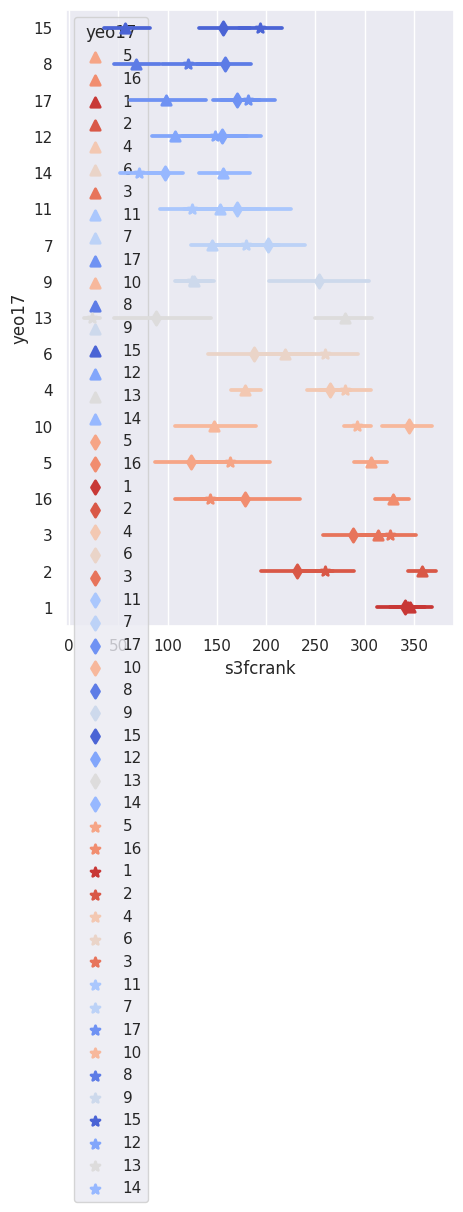

In [6]:
df.yeo17=df.yeo17.astype(str)
hue_order=df.groupby('yeo17')['fcrank'].mean().sort_values().index
keys=hue_order
values=sns.color_palette('coolwarm',17)
ax=sns.pointplot(data=df,x="s1fcrank", y="yeo17",hue="yeo17",order=hue_order,palette=dict(zip(keys,values)),markers="^")
ax=sns.pointplot(data=df,x="s2fcrank", y="yeo17",hue="yeo17",order=hue_order,palette=dict(zip(keys,values)),markers="d")
ax=sns.pointplot(data=df,x="s3fcrank", y="yeo17",hue="yeo17",order=hue_order,palette=dict(zip(keys,values)),markers="*")
sns.set(rc={"figure.figsize":(5,8)})
plt.savefig("/media/shuang/data/repository/figures/FCrank_3stage.svg", format="svg",dpi=1000)